## Python statistics essential training - 03_04_twovariables

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [4]:
gapminder = pd.read_csv('gapminder.csv')

In [5]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  float64
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  float64
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [6]:
italy = gapminder.query('country=="Italy"')

In [7]:
italy.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
6397,Italy,1800,Europe,18822234.0,29.69,54.259,5.47,2225.0,6.091718
6398,Italy,1810,Europe,19491674.0,29.69,54.395,5.47,2371.0,6.491444
6399,Italy,1820,Europe,20341608.0,29.69,54.531,5.47,2474.0,6.773443
6400,Italy,1830,Europe,21529667.0,29.69,54.667,5.47,2471.0,6.765229
6401,Italy,1840,Europe,22956667.0,29.69,54.804,5.47,2524.0,6.910335


<AxesSubplot:xlabel='year', ylabel='population'>

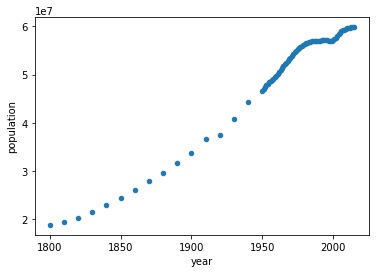

In [8]:
italy.plot.scatter('year','population')

<AxesSubplot:xlabel='year', ylabel='population'>

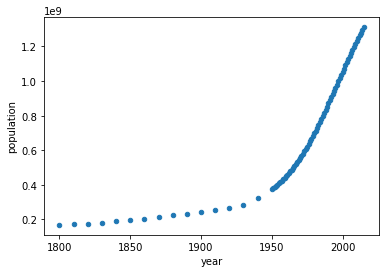

In [9]:
gapminder.query('country=="India"').plot.scatter("year","population")

<AxesSubplot:xlabel='year', ylabel='gdp_per_day'>

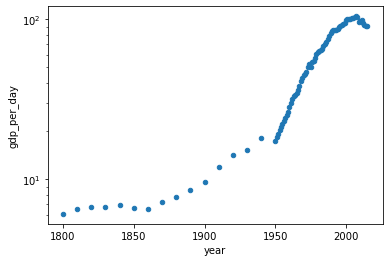

In [10]:
italy.plot.scatter('year','gdp_per_day',logy=True)

<AxesSubplot:xlabel='gdp_per_day', ylabel='life_expectancy'>

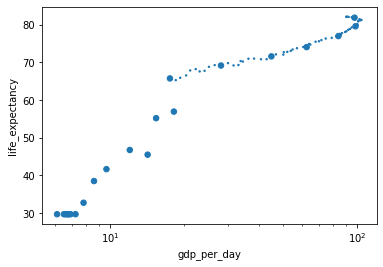

In [13]:
size = np.where(italy.year %10==0,30,2)
italy.plot.scatter('gdp_per_day','life_expectancy',logx=True,s=size)

<AxesSubplot:xlabel='gdp_per_day', ylabel='life_expectancy'>

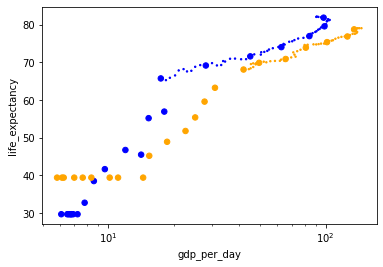

In [14]:
data = gapminder.query("(country=='Italy')or(country=='United States')")
size = np.where(data.year %10==0,30,2)
color = np.where(data.country =="Italy","blue","orange")
data.plot.scatter('gdp_per_day','life_expectancy',logx=True,s=size,c=color)

<AxesSubplot:xlabel='gdp_per_day', ylabel='life_expectancy'>

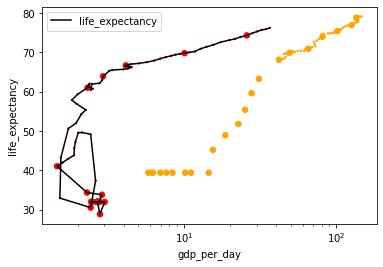

In [17]:
data = gapminder.query("(country=='China')or(country=='United States')")
size = np.where(data.year %10==0,30,2)
color = np.where(data.country =="China","red","orange")
ax = data.plot.scatter('gdp_per_day','life_expectancy',logx=True,s=size,c=color)
data[data.country=='China'].plot.line(x='gdp_per_day',y='life_expectancy',ax=ax,c='k')

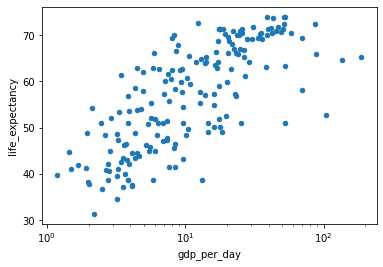

In [20]:
def plotyear(year):
    data = gapminder[gapminder.year==year]
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True)
plotyear(1965)

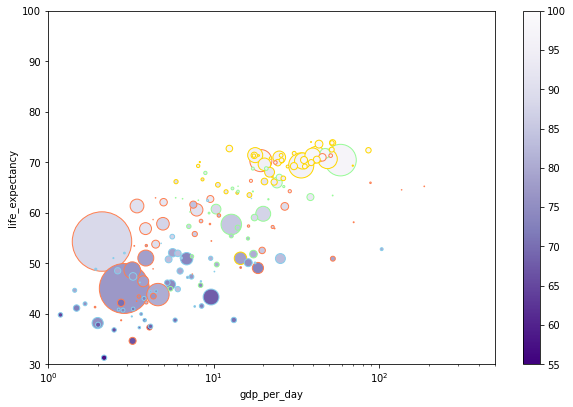

In [37]:
def plotyear(year):
    data = gapminder[gapminder.year==year].sort_values('population',ascending=False)
    area = 5e-6*data.population
    color = data.age5_surviving
    edgecolor = data.region.map({"Africa":'skyblue',"Europe":'gold',"America":'palegreen',"Asia":'coral'})
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,s = area,
                     linewidths=1,edgecolors=edgecolor,
                     c = color, colormap = matplotlib.cm.get_cmap('Purples_r'),vmin=55,vmax=100,
                     sharex=False,figsize=(10,6.5))
    pp.axis(xmin=1,xmax=500,ymin=30,ymax=100)
plotyear(1965)

In [38]:
interact(plotyear,year=range(1965,2015,10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005), value=1965), Output…

<function __main__.plotyear(year)>

In [40]:
gapminder[gapminder.year==2015].population.sum()

7292414176.0

In [42]:
gapminder[gapminder.year==2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

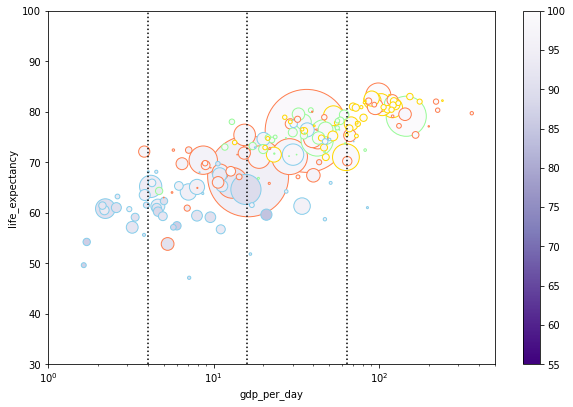

In [53]:
 def plotyear(year):
    data = gapminder[gapminder.year==year].sort_values('population',ascending=False)
    area = 5e-6*data.population
    color = data.age5_surviving
    edgecolor = data.region.map({"Africa":'skyblue',"Europe":'gold',"America":'palegreen',"Asia":'coral'})
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,s = area,
                     linewidths=1,edgecolors=edgecolor,
                     c = color, colormap = matplotlib.cm.get_cmap('Purples_r'),vmin=55,vmax=100,
                     sharex=False,figsize=(10,6.5))
    for level in [4,16,64]:
        pp.axvline(level,linestyle=':',color='k')
        
    pp.axis(xmin=1,xmax=500,ymin=30,ymax=100)
plotyear(2015)

array([[<AxesSubplot:xlabel='log10_gdp_per_day', ylabel='log10_gdp_per_day'>,
        <AxesSubplot:xlabel='life_expectancy', ylabel='log10_gdp_per_day'>,
        <AxesSubplot:xlabel='age5_surviving', ylabel='log10_gdp_per_day'>,
        <AxesSubplot:xlabel='babies_per_woman', ylabel='log10_gdp_per_day'>],
       [<AxesSubplot:xlabel='log10_gdp_per_day', ylabel='life_expectancy'>,
        <AxesSubplot:xlabel='life_expectancy', ylabel='life_expectancy'>,
        <AxesSubplot:xlabel='age5_surviving', ylabel='life_expectancy'>,
        <AxesSubplot:xlabel='babies_per_woman', ylabel='life_expectancy'>],
       [<AxesSubplot:xlabel='log10_gdp_per_day', ylabel='age5_surviving'>,
        <AxesSubplot:xlabel='life_expectancy', ylabel='age5_surviving'>,
        <AxesSubplot:xlabel='age5_surviving', ylabel='age5_surviving'>,
        <AxesSubplot:xlabel='babies_per_woman', ylabel='age5_surviving'>],
       [<AxesSubplot:xlabel='log10_gdp_per_day', ylabel='babies_per_woman'>,
        <AxesSubplot:x

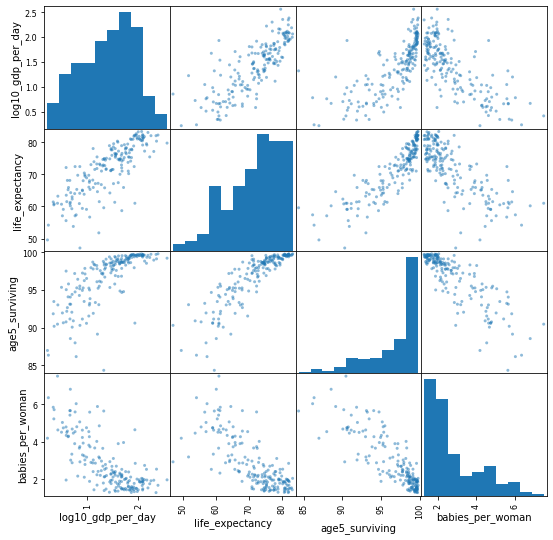

In [72]:
data['log10_gdp_per_day']=np.log10(data['gdp_per_day'])
#data = data.reindex(columns=columns)
data = gapminder.loc[gapminder.year == 2015, ['log10_gdp_per_day','life_expectancy'
                                              ,'age5_surviving','babies_per_woman']]
pd.plotting.scatter_matrix(data,figsize=(9,9))